# Produce absorption profile pattern
=======================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  20 April 2022



Read absorption patterns


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np
from os import listdir
import re

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
from astropy.table import Table

In [6]:
import pandas as pd

In [7]:
import time
from datetime import datetime,date
import dateutil.parser

In [8]:
today = date.today()
string_date=today.strftime("%Y-%m-%d")

# Configuration

## input file

In [9]:
inputfile_basename="absorption_pattern"

# Read files

In [20]:
filename_in=inputfile_basename+".csv"
df = pd.read_csv(filename_in,index_col=0)

In [21]:
df

,wl,o2_10,o2_11,o2_12,o2_13,o2_14,o2_15,o2_16,o2_17,o2_18,...,no2_16,no2_17,no2_18,no2_19,no2_20,no2_21,no2_22,no2_23,no2_24,no2_25
0,250.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999785,0.999772,0.999758,0.999745,0.999731,0.999718,0.999704,0.999691,0.999678,0.999664
1,251.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999841,0.999831,0.999821,0.999811,0.999801,0.999791,0.999781,0.999771,0.999761,0.999752
2,252.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999849,0.999839,0.999830,0.999821,0.999811,0.999802,0.999792,0.999783,0.999774,0.999764
3,253.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999842,0.999832,0.999822,0.999812,0.999802,0.999792,0.999782,0.999772,0.999763,0.999753
4,254.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.999834,0.999823,0.999813,0.999802,0.999792,0.999781,0.999771,0.999761,0.999750,0.999740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,1196.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
947,1197.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
948,1198.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
949,1199.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
def atmpatt_Dataf_to_np(df):
    o2_cols = []
    for tabcol in df.columns:
        if 'o2_' in tabcol and 'no2_' not in tabcol:
            o2_cols.append(tabcol)
            
    no2_cols = []
    for tabcol in df.columns:
        if 'no2_' in tabcol:
            no2_cols.append(tabcol)
            
            
    h2o_cols = []
    for tabcol in df.columns:
        if 'h2o_' in tabcol:
            h2o_cols.append(tabcol)
            
            
    o3_cols = []
    for tabcol in df.columns:
        if 'o3_' in  tabcol:
            o3_cols.append(tabcol)
            
            
    data_wl = df["wl"].to_numpy()
    data_o2 = df[o2_cols].to_numpy()
    data_o3 = df[o3_cols].to_numpy()
    data_h2o = df[h2o_cols].to_numpy()
    data_no2 = df[no2_cols].to_numpy()
    
    
    return data_wl, data_o2, data_o3, data_h2o, data_no2
    
    

In [57]:
wl,o2,o3,h2o,no2 = atmpatt_Dataf_to_np(df)

In [61]:
# number of airmass values
N = o2.shape[1]

In [64]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

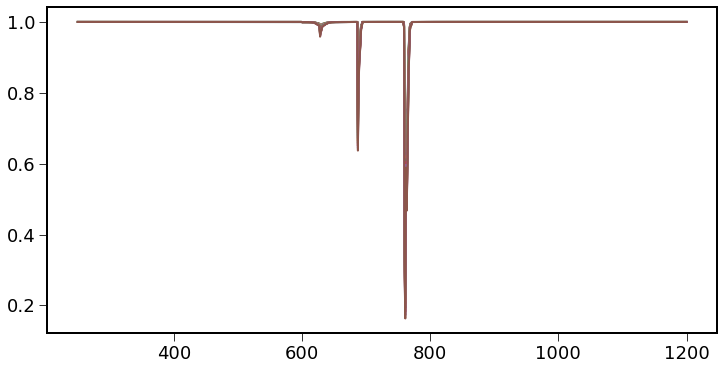

In [73]:
plt.plot(wl,o2);

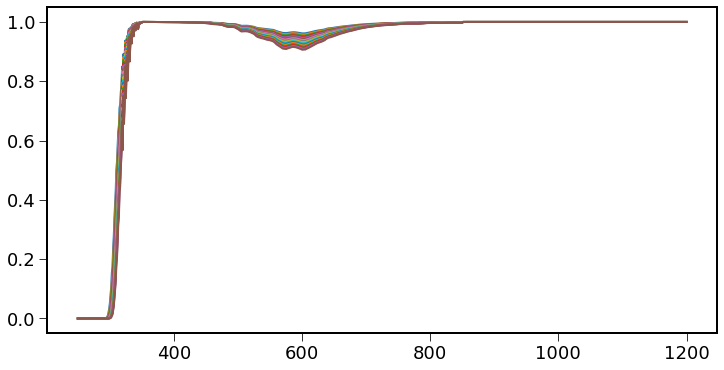

In [74]:
plt.plot(wl,o3);

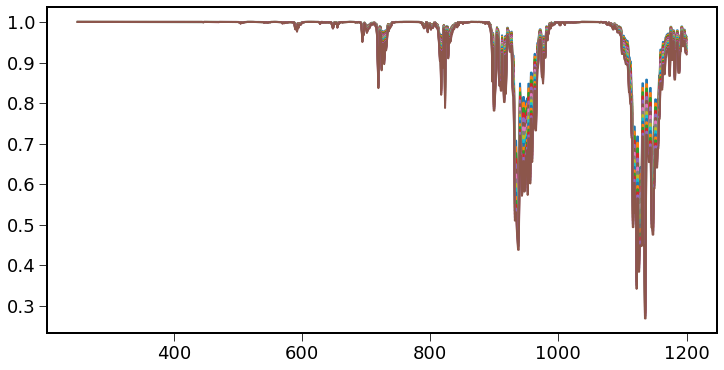

In [71]:
plt.plot(wl,h2o);

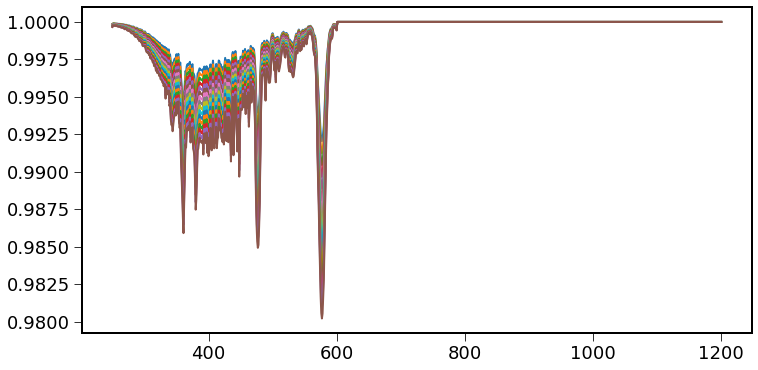

In [75]:
plt.plot(wl,no2);